In [4]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Pranshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# LOAD MODEL


In [6]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else 'cpu'

In [7]:
def load_model(model_name):
    theme_classifier = pipeline("zero-shot-classification", model=model_name, device=device)
    return theme_classifier

In [8]:
theme_classifier = load_model(model_name)


/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [10]:
theme_classifier(
    "i will never hit you again",
    theme_list,
    multi_label=True
)

{'sequence': 'i will never hit you again',
 'labels': ['sacrifice',
  'self development',
  'battle',
  'betrayal',
  'hope',
  'love',
  'friendship',
  'dialogue'],
 'scores': [0.7218785285949707,
  0.5974742770195007,
  0.4086676239967346,
  0.3647564947605133,
  0.2574174404144287,
  0.08031746000051498,
  0.07949194312095642,
  0.028260555118322372]}

# load dataset


In [11]:
files = glob('../data/Subtitles/*.ass')
files = sorted(files)

In [12]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines = [ ','.join(line.split(',')[9:]) for line in lines ]

In [13]:
lines[:4]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n',
 'it could smash mountains\\Nand create tidal waves.\n',
 'A band of Ninjas rose to\\Ndefend their village from attack.\n']

In [14]:
lines = [ line.replace('\\N',' ') for line in lines]

In [15]:
lines[:4]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n',
 'it could smash mountains and create tidal waves.\n',
 'A band of Ninjas rose to defend their village from attack.\n']

In [16]:
files[0]

'../data/Subtitles/Naruto Season 1 - 01.ass'

In [17]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [18]:
def load_subtitles_dataset(dataset_path):
    subtitile_path = glob(dataset_path+'/*.ass')
    subtitile_path = sorted(subtitile_path)

    scripts = []
    episode_num = []

    for path in subtitile_path:
        with open(path,'r') as file:
            lines = file.readlines()
            lines = lines[27:]
            lines = [ ','.join(line.split(',')[9:]) for line in lines ]
            
        lines = [ line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)
        episode = int(path.split('-')[-1].split('.')[0].strip())
        
        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({'episode':episode_num,'script':scripts})
    return df

In [19]:
dataset_path = '../data/Subtitles'
df = load_subtitles_dataset(dataset_path)
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


# Run Model

In [20]:
script = df.iloc[0]['script']
script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [21]:
script_sentences = sent_tokenize(script)
script_sentences

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!",
 'One great Ninja was able to imprison the monster,\n but died in the process.',
 'This Ninja was known as… the Fourth Hokage.',
 'Naruto!',
 'Why did you do such a thing?!',
 "You're really gonna get it this time!",
 "I don't care!",
 'You know your problem?',
 "You can't do the things I do!",
 'Only I can do this!',
 "I'm better than all of you!",
 'Believe it!',
 "There's a problem, sir!",
 'Lord Hokage!',
 'What is it?',
 'Did that Naruto do something again?',
 'Yes.',
 'He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!',
 'Wait!',
 'Ha ha…\n Why should I?',
 'Hey, Naruto!',
 'How did you suddenly get here, lruka Sensei?',
 'The q

In [22]:
# Batch Sentence
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [23]:
script_batches[:5]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [24]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x140c08640> was reported to be 2(when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x140c08640> was reported to be 2(when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x140c08640> was reported to be 2(when accessing len(

In [25]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9800739884376526,
   0.939690351486206,
   0.8546878695487976,
   0.7349810600280762,
   0.7284975647926331,
   0.1990975588560104

In [26]:
# wrangle output
themes= {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [27]:
themes

{'dialogue': [0.9800739884376526, 0.9370126128196716],
 'betrayal': [0.939690351486206, 0.6457259058952332],
 'battle': [0.8546878695487976, 0.6581321954727173],
 'sacrifice': [0.7349810600280762, 0.6258871555328369],
 'self development': [0.7284975647926331, 0.8678206205368042],
 'hope': [0.19909755885601044, 0.20424072444438934],
 'friendship': [0.05922349914908409, 0.08603283762931824],
 'love': [0.04026201367378235, 0.028020763769745827]}

In [28]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [29]:
df = df.head(5)

In [30]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


In [31]:
output_themes = df['script'].apply(get_themes_inference)

/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x14349e430> was reported to be 2(when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x14349e430> was reported to be 2(when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
/Users/Pranshu/Desktop/Project/NLP_Series Analysis/gradio_venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:750: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x14349e430> was reported to be 2(when accessing len(

In [32]:
output_themes

0    {'dialogue': 0.9585433006286621, 'betrayal': 0...
1    {'dialogue': 0.9606059789657593, 'sacrifice': ...
2    {'dialogue': 0.9430067837238312, 'sacrifice': ...
3    {'dialogue': 0.7951266169548035, 'sacrifice': ...
4    {'dialogue': 0.9142744541168213, 'betrayal': 0...
Name: script, dtype: object

In [33]:
theme_df =pd.DataFrame(output_themes.to_list())

In [34]:
theme_df

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.958543,0.792708,0.756410,0.680434,0.798159,0.201669,0.072628,0.034141
1,0.960606,0.429944,0.684846,0.570703,0.482812,0.154533,0.046261,0.173262
2,0.943007,0.339492,0.707887,0.661518,0.724143,0.573633,0.342221,0.394864
3,0.795127,0.554723,0.723675,0.652153,0.861327,0.445291,0.525343,0.315334
4,0.914274,0.891102,0.783643,0.585849,0.550459,0.093763,0.073857,0.054071


In [35]:
df[theme_df.columns] = theme_df
df 

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792708,0.756410,0.680434,0.798159,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.960606,0.429944,0.684846,0.570703,0.482812,0.154533,0.046261,0.173262
2,3,"C'mon!\n Running like a fugitive,\n Being chas...",0.943007,0.339492,0.707887,0.661518,0.724143,0.573633,0.342221,0.394864
3,4,"C'mon!\n Running like a fugitive,\n Being chas...",0.795127,0.554723,0.723675,0.652153,0.861327,0.445291,0.525343,0.315334
4,5,"C'mon!\n Running like a fugitive,\n Being chas...",0.914274,0.891102,0.783643,0.585849,0.550459,0.093763,0.073857,0.054071


In [36]:
df

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.958543,0.792708,0.756410,0.680434,0.798159,0.201669,0.072628,0.034141
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.960606,0.429944,0.684846,0.570703,0.482812,0.154533,0.046261,0.173262
2,3,"C'mon!\n Running like a fugitive,\n Being chas...",0.943007,0.339492,0.707887,0.661518,0.724143,0.573633,0.342221,0.394864
3,4,"C'mon!\n Running like a fugitive,\n Being chas...",0.795127,0.554723,0.723675,0.652153,0.861327,0.445291,0.525343,0.315334
4,5,"C'mon!\n Running like a fugitive,\n Being chas...",0.914274,0.891102,0.783643,0.585849,0.550459,0.093763,0.073857,0.054071


# Visualize O/P


In [37]:
df = df.drop('dialogue',axis=1)

In [38]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,3.007970
1,battle,3.656461
2,sacrifice,3.150657
3,self development,3.416900
4,hope,1.468889
5,friendship,1.060310
6,love,0.971672


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

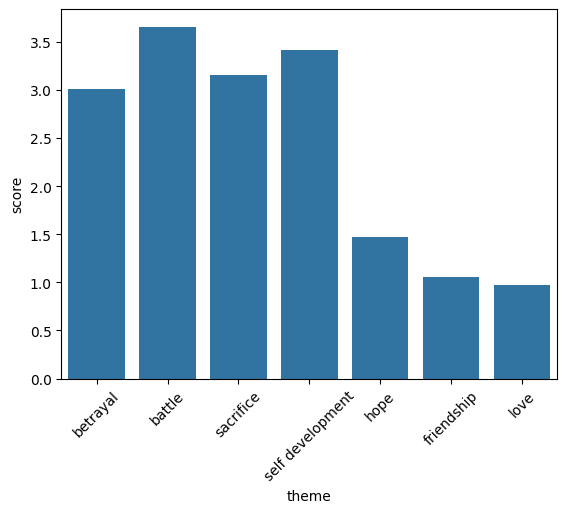

In [40]:
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()